Input: Pittsburgh is a city of bridge.
Phonemes:
['P', 'IH', 'T', 'S', 'B', 'ER', 'G', ' ', 'IH', 'Z', ' ', 'AH', ' ', 'S', 'IH', 'T', 'IY', ' ', 'AH', 'V', ' ', 'B', 'R', 'IH', 'JH', '.']


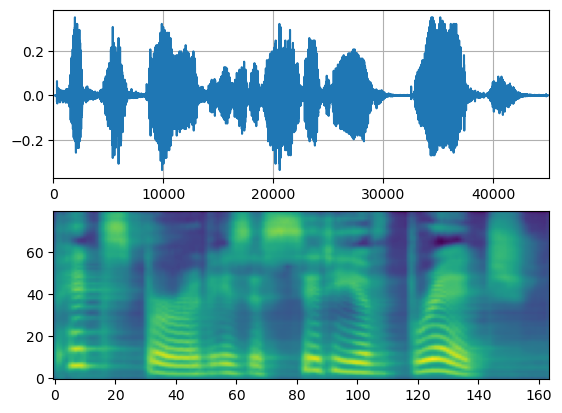

In [8]:

# you need to install pytorch, visit: https://pytorch.org/get-started/locally/

import torch
import torchaudio
import IPython
import matplotlib.pyplot as plt

torch.random.manual_seed(0)
device_tag = "cpu" 
if torch.backends.mps.is_available():
    device_tag = "mps"
elif torch.cuda.is_available():
    device_tag = "gpu"
    
# device = torch.device(device_tag)
device = torch.device("cpu")

bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
torchaudio.pipelines.Tacotron2TTSBundle
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = "Pittsburgh is a city of bridge."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)

def plot_sample_specs(k=3):
    fig, ax = plt.subplots(k, 1)
    for i in range(k):
        with torch.inference_mode():
            spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
        print(spec[0].shape)
        ax[i].imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")    

def plot_voice(waveforms, spec, sample_rate):
    waveforms = waveforms.cpu().detach()

    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.plot(waveforms[0])
    ax1.set_xlim(0, waveforms.size(-1))
    ax1.grid(True)
    ax2.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")

print("Input: {}".format(text))
print("Phonemes:")
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

plot_voice(waveforms, spec, vocoder.sample_rate)
IPython.display.Audio(waveforms.cpu().detach(), rate=vocoder.sample_rate)
